# Informe Final de la Prueba Técnica 1

**Autor:** Isabel Castrillón Acosta

**Fecha:** 25-06-2025

**Descripción del Proyecto:**


# 1. Explicación del Caso

- Empresa de construcción necesita estimar el costo de un proyecto de 36 meses de duración (tres años).

- Se debe estimar el costo de los equipos, con base en el cosato de las materias primas que lo componen (X, Y, Z). 

**Detalles de Equipos**

- Equipo 1: $0.2 * PrecioX + 0.8 * PrecioY $

- Equipo 2: $\frac{(PrecioX + PrecioY + PrecioZ)}{3} $

**Datos**

- Todos los dataframes tienen rangos de tiempos diferentes en la columna "Fecha" y una columna de "Precio".
- Se cuentan con tres dataframes:
  - X: contiene el costo de las materias primas X.
  - Y: contiene el costo de las materias primas Y.
  - Z: contiene el costo de las materias primas Z.


**Beneficios esperados**
- Presición en la estimación de costos, lo que permitirá una mejor planificación financiera del proceso.
- Optimización de recursos al seleccionar proveedores con la mejor relación costo-beneficio. 






# 2. Supuestos

- Suponemos que las predicciones se haran a futuro, por lo que haremos predicciones de los precios de las materias primas X, Y y Z, a 3 meses, 6 meses y 12 meses, 24 meses y 36 meses. A partir del 1 de julio de 2025.


# 3. Formas de resolver el caso y la opcion elegida

- Ya que cada dataframe tiene una cantidad de filas diferente y un rango de tiempo distinto, se puede hacer una regresion lineal para cada materia prima y luego hacer predicciones a futuro para las mismas fechas de las tres materias primas.
- Una vez obtenidas las predicciones, se pueden aplicar las formulas de los equipos, para calcular los costos a futuro de ambos equipos. 

- sin embargo, como no hay tendencia lineal en los datos, se opta por un modelo SARIMAX, que permite capturar la estacionalidad y las tendencias de los datos de series temporales.

# 4. Resultados del análisis de los datos y los modelos

## 4.1 Librerias

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

## 4.2 Cargar los dataframes



In [2]:
df_x = pd.read_csv('../Datos/X_cleaned.csv')
df_y = pd.read_csv('../Datos/Y_cleaned.csv')
df_z = pd.read_csv('../Datos/Z_cleaned.csv')

In [3]:
df_x.head(), df_y.head(), df_z.head()

(         Date  Price
 0  2024-04-04  89.18
 1  2024-04-03  89.35
 2  2024-04-02  88.92
 3  2024-04-01  87.42
 4  2024-03-28  87.48,
          Date   Price
 0  2023-09-12  547.33
 1  2023-09-11  546.00
 2  2023-09-08  545.00
 3  2023-09-07  550.00
 4  2023-09-06  552.50,
          Date    Price
 0  2010-01-01  2225.25
 1  2010-01-04  2225.25
 2  2010-01-05  2246.50
 3  2010-01-06  2302.50
 4  2010-01-07  2306.50)

## 4.3 Preprocesamiento de los datos

In [4]:
# Asegurar que la fecha es tipo datetime y ordenar

df_x['Date'] = pd.to_datetime(df_x['Date'])
df_x = df_x.sort_values('Date')

df_y['Date'] = pd.to_datetime(df_y['Date'])
df_y = df_y.sort_values('Date')

df_z['Date'] = pd.to_datetime(df_z['Date'])
df_z = df_z.sort_values('Date')

## 4.4 Modelo SARIMAX

### 4.4.1 Modelo SARIMAX para la materia prima X


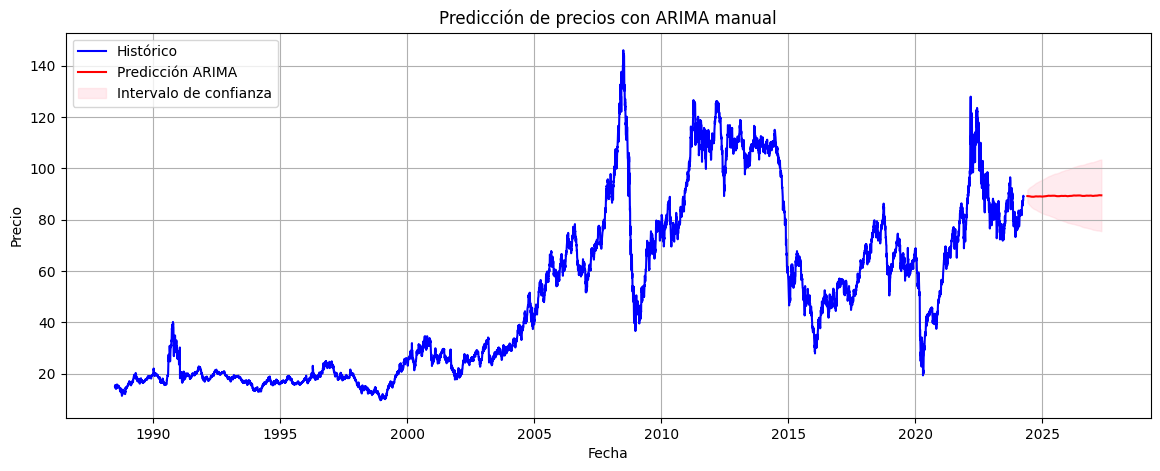

In [5]:
warnings.filterwarnings("ignore")

df_x_1 = df_x.copy()
df_x_1.set_index('Date', inplace=True)


# -----------------------------
# PRUEBA MANUAL DE MODELO ARIMA
# -----------------------------
# Puedes cambiar estos valores para probar otras combinaciones
order = (1, 1, 1)        # ARIMA(p,d,q)
seasonal_order = (1, 1, 1, 12)  # SARIMA(P,D,Q,s) para mensual

# Ajustar modelo
modelo = SARIMAX(df_x_1['Price'], 
                 order=order,
                 seasonal_order=seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Predicción a futuro
steps = 36
pred_x = resultado.get_forecast(steps=steps)
pred_mean_x = pred_x.predicted_mean
conf_int_x = pred_x.conf_int()

# Fechas futuras
last_date = df_x_1.index[-1]
fechas_futuras_x = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

# -----------------------------
# GRAFICAR RESULTADO
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(df_x_1.index, df_x_1['Price'], label='Histórico', color='blue')
plt.plot(fechas_futuras_x, pred_mean_x, label='Predicción ARIMA', color='red')
plt.fill_between(fechas_futuras_x, conf_int_x.iloc[:, 0], conf_int_x.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Predicción de precios con ARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


### 4.4.2 Modelo SARIMAX para la materia prima Y

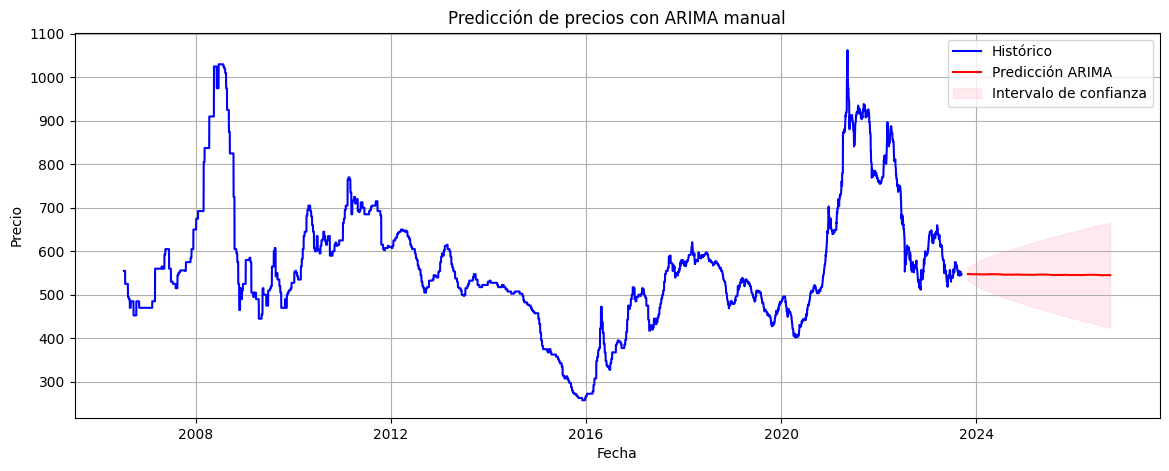

In [6]:
warnings.filterwarnings("ignore")

# Asegurarse de que 'fecha' es datetime y está ordenada
df_y_1 = df_y.copy()
df_y_1.set_index('Date', inplace=True)
# -----------------------------
# PRUEBA MANUAL DE MODELO ARIMA
# -----------------------------
# Puedes cambiar estos valores para probar otras combinaciones
order = (1, 1, 1)        # ARIMA(p,d,q)
seasonal_order = (1, 1, 1, 12)  # SARIMA(P,D,Q,s) para mensual

# Ajustar modelo
modelo = SARIMAX(df_y_1['Price'], 
                 order=order,
                 seasonal_order=seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Predicción a futuro
steps = 36
pred_y = resultado.get_forecast(steps=steps)
pred_mean_y = pred_y.predicted_mean
conf_int_y = pred_y.conf_int()

# Fechas futuras
last_date = df_y_1.index[-1]
fechas_futuras_y = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

# -----------------------------
# GRAFICAR RESULTADO
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(df_y_1.index, df_y_1['Price'], label='Histórico', color='blue')
plt.plot(fechas_futuras_y, pred_mean_y, label='Predicción ARIMA', color='red')
plt.fill_between(fechas_futuras_y, conf_int_y.iloc[:, 0], conf_int_y.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Predicción de precios con ARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


### 4.4.3 Modelo SARIMAX para la materia prima Z

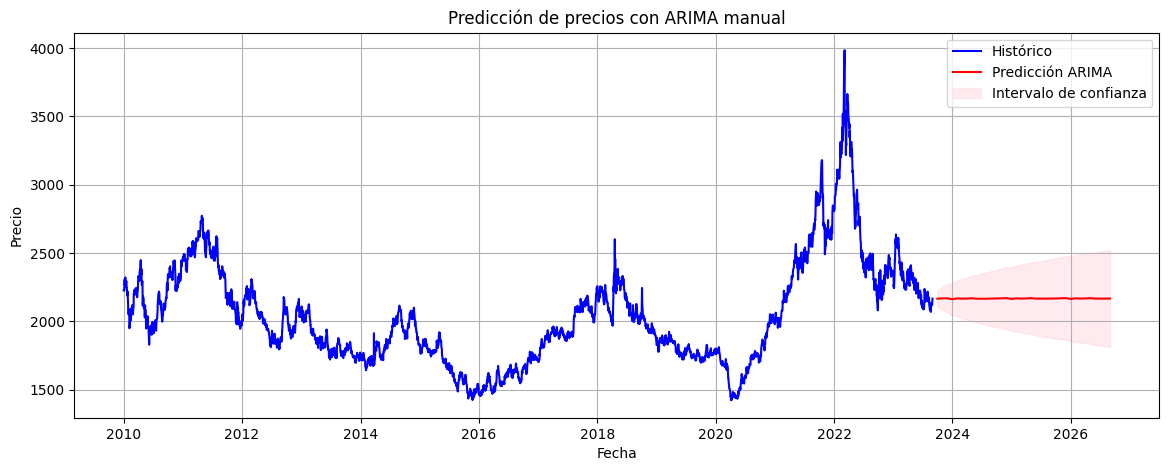

In [7]:
warnings.filterwarnings("ignore")

df_z_1 = df_z.copy()
df_z_1.set_index('Date', inplace=True)
# -----------------------------
# PRUEBA MANUAL DE MODELO ARIMA
# -----------------------------
# Puedes cambiar estos valores para probar otras combinaciones
order = (1, 1, 1)        # ARIMA(p,d,q)
seasonal_order = (1, 1, 1, 12)  # SARIMA(P,D,Q,s) para mensual

# Ajustar modelo
modelo = SARIMAX(df_z_1['Price'], 
                 order=order,
                 seasonal_order=seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Predicción a futuro
steps = 36
pred_z = resultado.get_forecast(steps=steps)
pred_mean_z = pred_z.predicted_mean
conf_int_z = pred_z.conf_int()

# Fechas futuras
last_date = df_z_1.index[-1]
fechas_futuras_z = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

# -----------------------------
# GRAFICAR RESULTADO
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(df_z_1.index, df_z_1['Price'], label='Histórico', color='blue')
plt.plot(fechas_futuras_z, pred_mean_z, label='Predicción ARIMA', color='red')
plt.fill_between(fechas_futuras_z, conf_int_z.iloc[:, 0], conf_int_z.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Predicción de precios con ARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


## 4.5 Poner las predicciones en un dataframe

In [9]:
# Crear tabla con predicción e intervalos de confianza
tabla_pred = pd.DataFrame({
    'Fecha': fechas_futuras,
    'Precio estimado': pred.predicted_mean.values,
    'IC inferior': pred.conf_int().iloc[:, 0].values,
    'IC superior': pred.conf_int().iloc[:, 1].values
})

tabla_pred.set_index('Fecha', inplace=True)


In [10]:
tabla_pred

,Precio estimado,IC inferior,IC superior
Fecha,,,
2023-10-31,547.693169,532.791805,562.594532
2023-11-30,547.192140,525.805663,568.578618
2023-12-31,547.211307,520.643619,573.778995
2024-01-31,547.014391,515.913578,578.115204
2024-02-29,546.728979,511.494814,581.963144
2024-03-31,547.152574,508.060467,586.244682
2024-04-30,547.296881,504.550194,590.043567
2024-05-31,547.256201,501.012574,593.499827
2024-06-30,546.904466,497.290635,596.518297


# 5. Futuras mejoras

# 6. Apreciaciones y comentarios del caso (opcional)